# Description

- Here we have 3 Datasets these datasets are the data of the job offers by companies in the field of software development and engineering from the famous website Wuzzuf 
- The aim of the project is to discover the most needed fields and jobs in the software industry and the requirements of the labor market

# Gathering

In [765]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


df_14_16=pd.read_excel('wuzzuf14_16.xlsx')
df_20=pd.read_excel('wuzzuf2020.xlsx')
df_21=pd.read_csv('ًwuzzaf9_8_2021.csv')


# Assess

#### Wuzzuf 2021 dataset

In [766]:
df_21.head(5)

,page_URL,job_title,company_names,job_link,job_link_link,job_description,location
0,https://wuzzuf.net/a/IT-Software-Development-J...,Business Development Specialist - Upper Egypt,golden,Business Development Specialist - Upper Egypt,https://wuzzuf.net/jobs/p/1623d22c-3de2-455a-...,Full Time · Experienced · 2+ Yrs of Exp · Bus...,- Aswan- Egypt
1,https://wuzzuf.net/a/IT-Software-Development-...,Senior/Intermediate .NET Core Developer (Remo...,Confidential,Senior/Intermediate .NET Core Developer (Remo...,https://wuzzuf.net/jobs/p/0efb55cc-3264-47b4-...,Full Time · Experienced · 4+ Yrs of Exp · Sof...,- Cairo- Egypt
2,https://wuzzuf.net/a/IT-Software-Development-...,Senior Software Developer,Bnsights,Senior Software Developer,https://wuzzuf.net/jobs/p/d76caa63-bc76-4839-...,Full Time · Experienced · 6-10 Yrs of Exp · S...,- New Cairo- Cairo
3,https://wuzzuf.net/a/IT-Software-Development-...,Software Developer / Desktop Development,ITS,Software Developer / Desktop Development,https://wuzzuf.net/jobs/p/2ffe3403-b147-4b38-...,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,- Nasr City- Cairo
4,https://wuzzuf.net/a/IT-Software-Development-...,Senior Software Developer -Dynamics 365...,CrossWorkers,Senior Software Developer -Dynamics 365...,https://wuzzuf.net/jobs/p/b6ae6a6a-47b8-47f7-...,Full Time · Experienced · 4-12 Yrs of Exp · A...,- New Cairo- Cairo


In [767]:
df_21.shape

(2635, 7)

In [768]:
df_21.columns

Index(['page_URL ', 'job_title ', 'company_names ', 'job_link ',
       'job_link_link', ' job_description', 'location'],
      dtype='object')

In [769]:
for i in range(5):
    print(df_21[' job_description'][i],'\n')


 Full Time · Experienced · 2+ Yrs of Exp · Business Development · Sales Skills · Sales · Sales Target · Architecture · Interior Designing · Marketing · Market Research · Marketing Analysis · English - June 16/ 2021 

 Full Time · Experienced · 4+ Yrs of Exp · Software · Software Engineering · Software Development · Web Development · .Net · ASP.Net · Web Application · jQuery · Javascript · Ajax - June 27/ 2021 

 Full Time · Experienced · 6-10 Yrs of Exp · Software Development · Information Technology (IT) · Computer Science · SQL · MVC · Angular · C# · .NET · Programming · Design · Software · javaScript - June 30/ 2021 

 Full Time · Entry Level · 0-2 Yrs of Exp · Computer Science · Information Technology (IT) · Software Development · .NET · C# · SQL · WCF · OOP · Debugging · Oracle · Architecture · javaScript - July 29/ 2021 

 Full Time · Experienced · 4-12 Yrs of Exp · AL Language · Azure SQL · C# · Computer Science · Dynamics 365 · Software Development · VS Code · IT/Software Devel

In [770]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   page_URL          2635 non-null   object
 1   job_title         2635 non-null   object
 2   company_names     2635 non-null   object
 3   job_link          2635 non-null   object
 4   job_link_link     2635 non-null   object
 5    job_description  2635 non-null   object
 6   location          2635 non-null   object
dtypes: object(7)
memory usage: 144.2+ KB


In [771]:
df_21.columns

Index(['page_URL ', 'job_title ', 'company_names ', 'job_link ',
       'job_link_link', ' job_description', 'location'],
      dtype='object')

In [772]:
# check for null values
df_21.isnull().sum()

page_URL            0
job_title           0
company_names       0
job_link            0
job_link_link       0
 job_description    0
location            0
dtype: int64

In [773]:
#check for duplicates
df_21.duplicated().sum()

0

In [774]:
df_21['job_title '].value_counts()

 IT Specialist                                      21
 Business Analyst                                   18
 Front End Developer                                15
 IT Help Desk Specialist                            14
 Graphic Designer                                   13
                                                    ..
 Senior Python Django Full Stack Developer Remot     1
 Senior Software Developer – C# + Blazor             1
 Full Stack Team Leader (Node.js)                    1
 Application Development Team Leader                 1
 Plant Manager                                       1
Name: job_title , Length: 1910, dtype: int64

In [775]:
df_21['company_names '].value_counts()

 Confidential                                   273
 FlairsTech                                      42
 Cegedim                                         31
 Fawry Banking & Payment Technology Services     20
 Perfect Presentation                            18
                                               ... 
 Innovito                                         1
 ALM-Atef Lamie&Co.                               1
 Maxab                                            1
 Max Muscle                                       1
 Hi Tech for medical devices and supplies         1
Name: company_names , Length: 987, dtype: int64

#### Wuzzuf 2020 dataset

In [776]:
df_20.head(5)

,#PAGE_URL,title,company-name,job-link,job-link_link,short-description-,location
0,https://wuzzuf.net/a/IT-Software-Development-J...,Sales Supervisor - North Upper Egypt,PepsiCo International,Sales Supervisor - North Upper Egypt,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt"
1,https://wuzzuf.net/a/IT-Software-Development-J...,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Junior Technical Support Engineer - Upper Egypt,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt"
2,https://wuzzuf.net/a/IT-Software-Development-J...,Software Developer,Rednet It Services,Software Developer,https://wuzzuf.net/jobs/p/7f3aec8d-1724-4f0c-9...,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo"
3,https://wuzzuf.net/a/IT-Software-Development-J...,Senior Software Quality Control Engineer,Bnsights,Senior Software Quality Control Engineer,https://wuzzuf.net/jobs/p/bbc5d1cb-33ff-4c10-a...,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo"
4,https://wuzzuf.net/a/IT-Software-Development-J...,Senior E-Commerce Software Developer (Magento 2),shop4build,Senior E-Commerce Software Developer (Magento 2),https://wuzzuf.net/jobs/p/2be88ac7-5a6c-4a5a-8...,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo"


In [777]:
df_20.columns

Index(['#PAGE_URL', 'title', 'company-name', 'job-link', 'job-link_link',
       'short-description-', 'location'],
      dtype='object')

In [778]:
for i in range(5):
    print(df_20['short-description-'][i],'\n')


Full Time · Manager · 1-3 Yrs of Exp · FMCG · Sales · Retail · Sales Skills · Sales/Retail - October 2 

Full Time · Entry Level · 1-2 Yrs of Exp · ITIL · Technical Support · Information Technology (IT) · Computer Science · Engineering · Computer Engineering · Software · Hardware - Novembe 

Full Time · Experienced · 2-3 Yrs of Exp · Software Development · C# · .NET · OOP · ADO.NET · SSRS · SSIS · Computer Engineering · Computer Science · Windows Forms · XML · javaScrip 

Full Time · Experienced · 3-5 Yrs of Exp · Computer Science · Quality Control · Information Technology (IT) · Quality Assurance · Software Testing · Testing · Software Development · ISTQB ·  

Full Time · Part Time · Work From Home · Experienced · 2+ Yrs of Exp · E-Commerce · PHP · MySQL · Agile · Information Technology (IT) · Computer Science · Software · CSS · javaScript 



In [779]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #PAGE_URL           2580 non-null   object
 1   title               2580 non-null   object
 2   company-name        2580 non-null   object
 3   job-link            2580 non-null   object
 4   job-link_link       2580 non-null   object
 5   short-description-  2580 non-null   object
 6   location            2580 non-null   object
dtypes: object(7)
memory usage: 141.2+ KB


In [780]:
# check for null values
df_20.isnull().sum()

#PAGE_URL             0
title                 0
company-name          0
job-link              0
job-link_link         0
short-description-    0
location              0
dtype: int64

In [781]:
#check for duplicates
df_20.duplicated().sum()

20

In [782]:
df_20.location.value_counts()

Maadi, Cairo            439
Cairo, Egypt            340
Nasr City, Cairo        328
New Cairo, Cairo        288
Heliopolis, Cairo       144
                       ... 
Victoria, Alexandria      1
Dammam, Saudi Arabia      1
Rehab City, Cairo         1
Minya, Egypt              1
Zagazig, Sharqia          1
Name: location, Length: 113, dtype: int64

In [783]:
df_20['company-name'].value_counts()

                                                    277
Ghassan Ahmed Alsulaiman for Electronic Services     21
Cegedim                                              20
Flairstech                                           20
CrossWorkers                                         16
                                                   ... 
Heliopolis University                                 1
Concrete For Real Estate                              1
digitex                                               1
Ghyma for Tourism                                     1
Zahran Market                                         1
Name: company-name, Length: 983, dtype: int64

#### Wuzzuf 2014 - 2016 dataset

In [784]:
df_14_16.payment_period.value_counts()

Per Month    14548
Per Year       107
Per Hour        51
Per Day         16
Per Week         3
Name: payment_period, dtype: int64

In [785]:
df_14_16.drop(0,inplace=True)
df_14_16.head(5)


,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency
1,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,1000.0,5000.0,8.0,Entry Level,0-2,2014-01-01 20:01:00,2213.0,<p>&bull;Placing jobs' ads on various websites...,NaN,Per Month,Egyptian Pound
2,7226ce78,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,2000.0,2500.0,1.0,Entry Level,2,2014-01-02 11:01:00,2940.0,"<span style=""text-decoration: underline;""><str...",NaN,Per Month,Egyptian Pound
3,f4b2bcd6,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,2000.0,3500.0,1.0,Entry Level,2-Jan,2014-01-02 12:01:00,2042.0,"<strong><span style=""text-decoration: underlin...",NaN,Per Month,Egyptian Pound
4,3fee6f73,Alexandria,Electrical Maintenance Engineer,Engineering,Select,Select,Food and Beverage Production,Select,Select,5000.0,8000.0,1.0,Experienced (Non-Manager),3-Jan,2014-01-21 13:45:00,5684.0,Job Title: Electrical Maintenance Engineer<br ...,NaN,Per Month,Egyptian Pound
5,22eb5fcb,Cairo,IT Adminstrator,IT/Software Development,Select,Select,Retail,Select,Select,3000.0,5000.0,1.0,Manager,5-Mar,2014-01-02 17:00:00,1644.0,&bull; Maintain the IT Retail Management Syste...,NaN,Per Month,Egyptian Pound


In [786]:
df_14_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21921 entries, 1 to 21921
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                14799 non-null  object        
 1   city              14732 non-null  object        
 2   job_title         14731 non-null  object        
 3   job_category1     14731 non-null  object        
 4   job_category2     14730 non-null  object        
 5   job_category3     14730 non-null  object        
 6   job_industry1     14730 non-null  object        
 7   job_industry2     14730 non-null  object        
 8   job_industry3     14730 non-null  object        
 9   salary_minimum    14730 non-null  float64       
 10  salary_maximum    14730 non-null  float64       
 11  num_vacancies     14730 non-null  float64       
 12  career_level      14730 non-null  object        
 13  experience_years  14730 non-null  object        
 14  post_date         1473

In [787]:
# check for null values
df_14_16.isnull().sum()

id                  7122
city                7189
job_title           7190
job_category1       7190
job_category2       7191
job_category3       7191
job_industry1       7191
job_industry2       7191
job_industry3       7191
salary_minimum      7191
salary_maximum      7191
num_vacancies       7191
career_level        7191
experience_years    7191
post_date           7191
views               7191
job_description     7381
job_requirements    8999
payment_period      7196
currency            7196
dtype: int64

In [788]:
#check for duplicates
df_14_16.duplicated().sum()

7132

In [789]:
df_14_16.columns

Index(['id', 'city', 'job_title', 'job_category1', 'job_category2',
       'job_category3', 'job_industry1', 'job_industry2', 'job_industry3',
       'salary_minimum', 'salary_maximum', 'num_vacancies', 'career_level',
       'experience_years', 'post_date', 'views', 'job_description',
       'job_requirements', 'payment_period', 'currency'],
      dtype='object')

In [790]:
for i in range(1,3):
    print(df_14_16['job_description'][i],'\n')

<p>&bull;Placing jobs' ads on various websites for the purpose of creating a big pool of candidates<br />&bull;Handling CV&rsquo;s whether electronic or hard copy from receipt to short listing and filing.<br />&bull;Generating a pool of qualified candidates, according to customer requirements.<br />&bull;Following up with both clients and short listed candidates till the end of the recruitment process<br />&bull;Keeping social media means up to date (Face book, website)<br />&bull;Updating recruitment system to make searching for the right candidate easier<br />&bull;Maintaining and updating all recruitment contracts and invoices filing<br />&bull;Maintains Employee Handbook with updated resolutions and other pertinent information, as needed.<br />&bull;Assisting the admin and personnel department when necessary<br />&bull;Self motivated and willing to learn and grow<br />&bull;Business oriented, achiever with proven track record<br />&bull;Ability to learn new tasks quickly, creativit

In [791]:
for i in range(1,10):
    print(df_14_16['job_industry1'][i])
    print(df_14_16['job_industry2'][i])
    print(df_14_16['job_industry3'][i],'\n')



Translation and Localization   
Business Services - Other
Education 

Computer Software
Select
Select 

Telecommunications Services
Select
Select 

Food and Beverage Production
Select
Select 

Retail
Select
Select 

Computer Software
Select
Select 

Chemicals/Petro-Chemicals
Oil and Energy   
Select 

Computer Software
Information Technology Services   
Select 

Chemicals/Petro-Chemicals
Select
Select 



In [792]:
for i in range(1,10):
    print(df_14_16['job_category1'][i])
    print(df_14_16['job_category2'][i])
    print(df_14_16['job_category3'][i],'\n')



Customer Service/Support
Administration
Human Resources 

IT/Software Development
Select
Select 

IT/Software Development
Select
Select 

Engineering
Select
Select 

IT/Software Development
Select
Select 

IT/Software Development
Select
Select 

Engineering
Select
Select 

IT/Software Development
Engineering
Select 

Engineering
Select
Select 



In [793]:
df_14_16.city.value_counts()

Cairo                                          10034
Giza                                            2593
Alexandria                                       719
Mansoura                                          70
10th of Ramadan                                   68
                                               ...  
Matrouh & ÙAlexandar                              1
Sadat Industrial City, Monufia Governorate.        1
Ismailia ,Mansoura                                 1
giza mohandseen                                    1
Cairo or Alexandria or any                         1
Name: city, Length: 355, dtype: int64

In [794]:
df_14_16.job_title.value_counts()

Graphic Designer                                       363
Web Developer                                          146
PHP Developer                                          127
Web Designer                                           127
Senior PHP Developer                                    94
                                                      ... 
Field Application Engineer                               1
C# Software Engineer                                     1
Technical Support Engineer - Electrical Engineering      1
IT/Software                                              1
Quality Control Engineer (Alexandria)                    1
Name: job_title, Length: 7365, dtype: int64

In [795]:
df_14_16.job_category1.value_counts()

IT/Software Development                 5557
Engineering                             2753
Creative/Design                         1576
Customer Service/Support                1043
Marketing                                655
Quality Assurance/Quality Control        471
Editorial/Writing                        414
Administration                           358
Project/Program Management               260
Sales/Retail/Business Development        258
Installation/Maintenance/Repair          230
Manufacturing/Production/Operations      180
Education/Training                       143
Medical                                   93
Biotech/R&D/Science                       85
Pharmaceutical                            80
Research                                  79
Logistics/Transportation                  64
Building Construction/Skilled Trades      62
Management                                61
Business                                  55
Media/Journalism/Publishing               55
Tourism/Tr

In [796]:
df_14_16.job_category2.value_counts().head(5)

Select                             7489
Engineering                        1201
IT/Software Development             819
Installation/Maintenance/Repair     812
Creative/Design                     503
Name: job_category2, dtype: int64

In [797]:
df_14_16.job_category3.value_counts().head(5)

Select                             12760
Engineering                          249
Customer Service/Support             146
IT/Software Development              139
Installation/Maintenance/Repair      136
Name: job_category3, dtype: int64

In [798]:
df_14_16.job_industry1.value_counts()

Computer Software                     2509
Information Technology Services       1652
Computer/IT Services                   811
Advertising and PR Services            618
Engineering Services                   498
                                      ... 
Public Policy                            1
Waste Management                         1
Music                                    1
Religious Institutions                   1
Select                                   1
Name: job_industry1, Length: 112, dtype: int64

In [799]:
df_14_16.job_industry2.value_counts().head()

Select                                8605
Computer/IT Services                   764
Computer Software                      738
Information Technology Services        503
Engineering Services                   309
Name: job_industry2, dtype: int64

In [800]:
df_14_16.job_industry3.value_counts().head()

Select                                12032
Information Technology Services         307
Computer/IT Services                    296
Computer Software                       161
Engineering Services                    141
Name: job_industry3, dtype: int64

In [801]:
df_14_16.num_vacancies.value_counts().head()

1.0    8889
2.0    2573
3.0    1119
5.0     604
8.0     520
Name: num_vacancies, dtype: int64

In [802]:
df_14_16.career_level.value_counts().head()

Experienced (Non-Manager)           9718
Entry Level                         3627
Manager                             1197
Student                              132
Senior Management (e.g. VP, CEO)      56
Name: career_level, dtype: int64

In [803]:
df_14_16.currency.value_counts().head()

Egyptian Pound          14414
United States Dollar      218
Saudi Arabian Riyal        57
U.A. Emirates Dirham       11
Euro                        8
Name: currency, dtype: int64

## Assessing Results

##### `IT and Software jobs 2021` dataset

- We need to rename some columns

- Discription column and title column will be divided to several columns

- some columns needed to be removed

- some companies hide their names 

- we need to add a column for the post year

##### `IT and Software jobs 2020` dataset

- We need to rename some columns

- Discription column and title column will be divided to several columns

- some columns needed to be removed

- some companies hide their names 

- we need to add a column for the post year

##### `IT and Software jobs 2014 -2016` dataset

- There are a lot of null values 

- There are a lot of duplicates

- in  job_category 2 and 3 and job_industry 2 and 3 most of the inputs are the word 'Select'

- we need to remove HTML tags from job description and job requirements data 

- some columns need to be removed

- experience must be an integer

- some minimum and maximum salaries containes are zeros or needed to be fixed

- some job titles are arabic words or not encoded well

- some columns data have arabic words or not encoded well


# Cleaning

##### `IT and Software jobs 2014 -2016` dataset

- There are a lot of null values 

- There are a lot of duplicates

- in  job_category 2 and 3 and job_industry 2 and 3 most of the inputs are the word 'Select'

- we need to remove HTML tags from job description and job requirements data 

- some columns need to be removed

- experience must be an integer

- some minimum and maximum salaries containes are zeros or needed to be fixed

- some job titles are arabic words or not encoded well

- some columns data have arabic words or not encoded well

In [804]:
df_14_16_copy=df_14_16.copy()
df_14_16_copy.head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency
1,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,1000.0,5000.0,8.0,Entry Level,0-2,2014-01-01 20:01:00,2213.0,<p>&bull;Placing jobs' ads on various websites...,NaN,Per Month,Egyptian Pound
2,7226ce78,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,2000.0,2500.0,1.0,Entry Level,2,2014-01-02 11:01:00,2940.0,"<span style=""text-decoration: underline;""><str...",NaN,Per Month,Egyptian Pound
3,f4b2bcd6,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,2000.0,3500.0,1.0,Entry Level,2-Jan,2014-01-02 12:01:00,2042.0,"<strong><span style=""text-decoration: underlin...",NaN,Per Month,Egyptian Pound


##  Define

-There are a lot of duplicates

In [805]:
df_14_16_copy.isnull().sum()

id                  7122
city                7189
job_title           7190
job_category1       7190
job_category2       7191
job_category3       7191
job_industry1       7191
job_industry2       7191
job_industry3       7191
salary_minimum      7191
salary_maximum      7191
num_vacancies       7191
career_level        7191
experience_years    7191
post_date           7191
views               7191
job_description     7381
job_requirements    8999
payment_period      7196
currency            7196
dtype: int64

In [806]:
df_14_16_copy.head(1)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency
1,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,1000.0,5000.0,8.0,Entry Level,0-2,2014-01-01 20:01:00,2213.0,<p>&bull;Placing jobs' ads on various websites...,NaN,Per Month,Egyptian Pound


## Code

In [807]:
df_14_16_copy.dropna(inplace= True)
df_14_16_copy.reset_index(drop=True, inplace=True)

In [808]:
df_14_16_copy.head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency
0,77d749b9,Cairo,Senior PHP Developer,IT/Software Development,Select,Select,Computer Software,Computer/IT Services,Select,3500.0,7500.0,5.0,Experienced (Non-Manager),7-Mar,2014-01-05 19:01:00,1055.0,"<p><span style=""text-decoration: underline;""><...","<p>1. Solid commercial knowledge of PHP, XHTML...",Per Month,Egyptian Pound
1,e849d634,Alexandria,Secretary,Administration,Customer Service/Support,Sales/Retail/Business Development,Medical Devices and Supplies,Select,Select,1200.0,1800.0,1.0,Entry Level,0-5,2014-01-16 13:01:00,1752.0,<strong>Job Description:</strong> <br /><br />...,"<span style=""text-decoration: underline;""><str...",Per Month,Egyptian Pound
2,d9a1cca9,Cairo,Tour operator and Social Media Associate,Marketing,Select,Select,Online Media,"Travel, Transportation and Tourism",Select,800.0,1700.0,1.0,Experienced (Non-Manager),2-Jan,2014-01-18 22:01:00,1021.0,<p>We are looking for a super star who have pa...,<strong>Tour operator reuirments:</strong>_x00...,Per Month,Egyptian Pound


## Test

In [809]:
df_14_16_copy.isnull().sum()

id                  0
city                0
job_title           0
job_category1       0
job_category2       0
job_category3       0
job_industry1       0
job_industry2       0
job_industry3       0
salary_minimum      0
salary_maximum      0
num_vacancies       0
career_level        0
experience_years    0
post_date           0
views               0
job_description     0
job_requirements    0
payment_period      0
currency            0
dtype: int64

In [810]:
df_14_16_copy.shape

(12837, 20)

##  Define


-we need to remove HTML tags from job description and job requirements data 


## Code

In [811]:
df_14_16_copy.job_description[0]

'<p><span style="text-decoration: underline;"><strong>Desired Experience<br /><br /></strong></span></p>_x000D_\n<ul>_x000D_\n<li>PHP Development Experience, Must be expert with <span style="text-decoration: underline;"><strong>Minimum 3 Years</strong></span></li>_x000D_\n<li>HTML / CSS &amp; java Script / JQuery Knowledge Must be expert with <strong><span style="text-decoration: underline;">Minimum 3 Years</span></strong></li>_x000D_\n<li>Experience with <strong>node.js, Backbone.js, and MongoDB</strong> Must be at least good with Minimum 2 Years of experience</li>_x000D_\n<li>MySql optimization Expert Must be expert with <span style="text-decoration: underline;"><strong>Minimum 3 Years</strong></span></li>_x000D_\n<li><strong>Caching and indexing</strong> Must be expert with Minimum 3 Years</li>_x000D_\n<li>Building APIs (Internal and External) Must be at least good with Minimum 3 Years of experience</li>_x000D_\n<li>Strong Knowledge of <strong>Symfony / Zend/ CakePHP</strong> Must b

In [812]:
df_14_16_copy.job_requirements[0]

'<p>1. Solid commercial knowledge of PHP, XHTML, CSS 2 &amp; 3,JavaScript, AJAX, JSON, JQuery.<br /><br />2. Cross browser development skillsExperience with MySql. <br /><br />3. Familiar with stored procedures, function and triggers.<br /><br />4. Experience in working with web based custom applications and portals<br /><br />5. Experience with SVN .<br /><br />6. A talent for communicating ideas, issues and solutions in a team environmentStrong communication skills, both written and verbal<br /><br />7. B. Sc. In Computer Science, Information Systems or IT related degree.<br /><br />8. Minimum of 3+ years of practical experience in PHP development for large-scale, web-based applications using Zend Framework, CakePHP, ...etc<br /><br />9. Solid grounding in the fundamentals of Object-Oriented Design and design patterns, with particular emphasis on MVC.<br /><br />10. Front-end skills with experience in HTML, CSS, JavaScript, jQuery, AJAX and XML.<br /><br />11. Extensive knowledge of 

In [813]:
def cleanhtml(raw_html):
    
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = re.sub(cleanr, '', raw_html)
    cleantext=cleantext.replace('_x000D_\n',' ')
    return cleantext

In [814]:
size=df_14_16_copy.shape[0]

for i in range(0,size):
    df_14_16_copy.job_description[i]=cleanhtml(df_14_16_copy.job_description[i])
    df_14_16_copy.job_requirements[i]=cleanhtml(df_14_16_copy.job_requirements[i])

    

<ipython-input-814-1e4003d61ec0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14_16_copy.job_description[i]=cleanhtml(df_14_16_copy.job_description[i])
<ipython-input-814-1e4003d61ec0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14_16_copy.job_requirements[i]=cleanhtml(df_14_16_copy.job_requirements[i])


## Test

In [815]:
df_14_16_copy.job_description[0]

'Desired Experience  PHP Development Experience, Must be expert with Minimum 3 Years HTML / CSS  java Script / JQuery Knowledge Must be expert with Minimum 3 Years Experience with node.js, Backbone.js, and MongoDB Must be at least good with Minimum 2 Years of experience MySql optimization Expert Must be expert with Minimum 3 Years Caching and indexing Must be expert with Minimum 3 Years Building APIs (Internal and External) Must be at least good with Minimum 3 Years of experience Strong Knowledge of Symfony / Zend/ CakePHP Must be at least good with Minimum 2 Years of experience Smarty(PHP template language) Must be at least good with Minimum 2 Years of experience Performance tuning (code enhancement, sql optimization, caching system, configuration of application, etc) Mobile sites Must be at least good with Minimum 2 Years of experience Android / IOS is a plus.  PLEASE READ FULL JOB DESCRIPTION BEFORE APPLYING!!'

In [816]:
df_14_16_copy.job_requirements[0]

'1. Solid commercial knowledge of PHP, XHTML, CSS 2  3,JavaScript, AJAX, JSON, JQuery.2. Cross browser development skillsExperience with MySql. 3. Familiar with stored procedures, function and triggers.4. Experience in working with web based custom applications and portals5. Experience with SVN .6. A talent for communicating ideas, issues and solutions in a team environmentStrong communication skills, both written and verbal7. B. Sc. In Computer Science, Information Systems or IT related degree.8. Minimum of 3+ years of practical experience in PHP development for large-scale, web-based applications using Zend Framework, CakePHP, ...etc9. Solid grounding in the fundamentals of Object-Oriented Design and design patterns, with particular emphasis on MVC.10. Front-end skills with experience in HTML, CSS, JavaScript, jQuery, AJAX and XML.11. Extensive knowledge of SQL databases - MySql is preferred, Oracle is a plus.12. Good knowledge base of Linux and Windows operating systems and Networki

##  Define
-in 'job_category2', 'job_category3', 'job_industry2', 'job_industry3' most of the inputs are the word 'Select' 

In [817]:
df_14_16_copy.head()

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency
0,77d749b9,Cairo,Senior PHP Developer,IT/Software Development,Select,Select,Computer Software,Computer/IT Services,Select,3500.0,7500.0,5.0,Experienced (Non-Manager),7-Mar,2014-01-05 19:01:00,1055.0,Desired Experience PHP Development Experience...,"1. Solid commercial knowledge of PHP, XHTML, C...",Per Month,Egyptian Pound
1,e849d634,Alexandria,Secretary,Administration,Customer Service/Support,Sales/Retail/Business Development,Medical Devices and Supplies,Select,Select,1200.0,1800.0,1.0,Entry Level,0-5,2014-01-16 13:01:00,1752.0,"Job Description: Coordination for departments,...",Must be Male,Per Month,Egyptian Pound
2,d9a1cca9,Cairo,Tour operator and Social Media Associate,Marketing,Select,Select,Online Media,"Travel, Transportation and Tourism",Select,800.0,1700.0,1.0,Experienced (Non-Manager),2-Jan,2014-01-18 22:01:00,1021.0,We are looking for a super star who have past ...,Tour operator reuirments: 1-2 years minumum e...,Per Month,Egyptian Pound
3,ed5040f2,Cairo,Web Developer,IT/Software Development,Select,Select,Computer Software,Human Resources,Select,2000.0,3000.0,1.0,Entry Level,2,2014-01-19 13:01:00,1.0,Write your job summary and responsibilities.,Write required skills and expertise of desired...,Per Month,Egyptian Pound
4,1c06f227,Cairo,Business Intelligence,IT/Software Development,Select,Select,Computer Software,Select,Select,4000.0,6000.0,5.0,Experienced (Non-Manager),2+,2014-01-19 15:01:00,1215.0,Performs a variety of development assignments...,#NAME?,Per Month,Egyptian Pound


In [818]:
for i in range(1,100):
    print(df_14_16_copy['job_category1'][i])
    print(df_14_16_copy['job_category2'][i])
    print(df_14_16_copy['job_category3'][i],'\n')



Administration
Customer Service/Support
Sales/Retail/Business Development 

Marketing
Select
Select 

IT/Software Development
Select
Select 

IT/Software Development
Select
Select 

Engineering
Select
Select 

IT/Software Development
Engineering
Select 

IT/Software Development
Administration
Select 

IT/Software Development
Select
Select 

Creative/Design
Select
Select 

Engineering
Select
Select 

IT/Software Development
Select
Select 

IT/Software Development
Select
Select 

Marketing
IT/Software Development
Research 

IT/Software Development
Select
Select 

Customer Service/Support
Select
Select 

Customer Service/Support
Select
Select 

IT/Software Development
Select
Select 

IT/Software Development
Select
Select 

IT/Software Development
Creative/Design
Select 

Manufacturing/Production/Operations
Engineering
Select 

IT/Software Development
Select
Select 

IT/Software Development
Select
Select 

Editorial/Writing
Select
Select 

IT/Software Development
Select
Select 

Editorial/

In [819]:
df_14_16_copy.job_category1.value_counts().head(3)

IT/Software Development    4866
Engineering                2345
Creative/Design            1344
Name: job_category1, dtype: int64

In [820]:
df_14_16_copy.job_category2.value_counts().head(3)

Select                             6322
Engineering                        1072
Installation/Maintenance/Repair     752
Name: job_category2, dtype: int64

In [821]:
df_14_16_copy.job_category3.value_counts().head(3)

Select                     11039
Engineering                  234
IT/Software Development      134
Name: job_category3, dtype: int64

In [822]:
df_14_16_copy.job_industry1.value_counts().head(3)

Computer Software                     2228
Information Technology Services       1463
Computer/IT Services                   704
Name: job_industry1, dtype: int64

In [823]:
df_14_16_copy.job_industry2.value_counts().head(3)

Select                  7338
Computer/IT Services     683
Computer Software        667
Name: job_industry2, dtype: int64

In [824]:
df_14_16_copy.job_industry3.value_counts().head(3)

Select                                10369
Information Technology Services         275
Computer/IT Services                    274
Name: job_industry3, dtype: int64

## Code

In [825]:
# as most of the data in job_category 2 and 3 and job_industry 2 and 3 are useless so we will drop them
# we will also drop id 
df_14_16_copy.drop(columns=['id','job_category2','job_category3','job_industry2','job_industry3'],axis=1,inplace=True)


## Test

In [826]:
df_14_16_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12837 entries, 0 to 12836
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   city              12837 non-null  object        
 1   job_title         12837 non-null  object        
 2   job_category1     12837 non-null  object        
 3   job_industry1     12837 non-null  object        
 4   salary_minimum    12837 non-null  float64       
 5   salary_maximum    12837 non-null  float64       
 6   num_vacancies     12837 non-null  float64       
 7   career_level      12837 non-null  object        
 8   experience_years  12837 non-null  object        
 9   post_date         12837 non-null  datetime64[ns]
 10  views             12837 non-null  float64       
 11  job_description   12837 non-null  object        
 12  job_requirements  12837 non-null  object        
 13  payment_period    12837 non-null  object        
 14  currency          1283

##  Define
-There are a lot of duplicates

In [827]:
df_14_16_copy.duplicated().sum()

18

## Code

In [828]:
df_14_16_copy.drop_duplicates(inplace=True)

## Test

In [829]:
df_14_16_copy.duplicated().sum()

0

##  Define


-some columns need rename

## Code

In [830]:
df_14_16_copy=df_14_16_copy.rename(columns={'career_level': 'level' ,'job_category1':'Standered_Title','city':'location','job_description':'description','job_industry1':'job_industry'})

## Test

In [831]:
df_14_16_copy.head()

,location,job_title,Standered_Title,job_industry,salary_minimum,salary_maximum,num_vacancies,level,experience_years,post_date,views,description,job_requirements,payment_period,currency
0,Cairo,Senior PHP Developer,IT/Software Development,Computer Software,3500.0,7500.0,5.0,Experienced (Non-Manager),7-Mar,2014-01-05 19:01:00,1055.0,Desired Experience PHP Development Experience...,"1. Solid commercial knowledge of PHP, XHTML, C...",Per Month,Egyptian Pound
1,Alexandria,Secretary,Administration,Medical Devices and Supplies,1200.0,1800.0,1.0,Entry Level,0-5,2014-01-16 13:01:00,1752.0,"Job Description: Coordination for departments,...",Must be Male,Per Month,Egyptian Pound
2,Cairo,Tour operator and Social Media Associate,Marketing,Online Media,800.0,1700.0,1.0,Experienced (Non-Manager),2-Jan,2014-01-18 22:01:00,1021.0,We are looking for a super star who have past ...,Tour operator reuirments: 1-2 years minumum e...,Per Month,Egyptian Pound
3,Cairo,Web Developer,IT/Software Development,Computer Software,2000.0,3000.0,1.0,Entry Level,2,2014-01-19 13:01:00,1.0,Write your job summary and responsibilities.,Write required skills and expertise of desired...,Per Month,Egyptian Pound
4,Cairo,Business Intelligence,IT/Software Development,Computer Software,4000.0,6000.0,5.0,Experienced (Non-Manager),2+,2014-01-19 15:01:00,1215.0,Performs a variety of development assignments...,#NAME?,Per Month,Egyptian Pound


In [832]:
The_job_title=df_14_16_copy.job_title
Standered_title=[]
for i in The_job_title:
    if 'IT' in i:
        Standered_title.append('IT')     
    elif 'Full Stack' or 'full stack' or 'Developer' or 'developer' or 'END' or 'end' in i:
        Standered_title.append('Software Engneering') 

    else:
        Standered_title.append('not mentioned')  
#levels
print(set(Standered_title))
print(len(Standered_title))
print(len(df_14_16_copy.job_title))

df_14_16_copy['Standered_Title']=Standered_title
        

{'IT', 'Software Engneering'}
12819
12819


In [833]:
df_14_16_copy.head()

,location,job_title,Standered_Title,job_industry,salary_minimum,salary_maximum,num_vacancies,level,experience_years,post_date,views,description,job_requirements,payment_period,currency
0,Cairo,Senior PHP Developer,Software Engneering,Computer Software,3500.0,7500.0,5.0,Experienced (Non-Manager),7-Mar,2014-01-05 19:01:00,1055.0,Desired Experience PHP Development Experience...,"1. Solid commercial knowledge of PHP, XHTML, C...",Per Month,Egyptian Pound
1,Alexandria,Secretary,Software Engneering,Medical Devices and Supplies,1200.0,1800.0,1.0,Entry Level,0-5,2014-01-16 13:01:00,1752.0,"Job Description: Coordination for departments,...",Must be Male,Per Month,Egyptian Pound
2,Cairo,Tour operator and Social Media Associate,Software Engneering,Online Media,800.0,1700.0,1.0,Experienced (Non-Manager),2-Jan,2014-01-18 22:01:00,1021.0,We are looking for a super star who have past ...,Tour operator reuirments: 1-2 years minumum e...,Per Month,Egyptian Pound
3,Cairo,Web Developer,Software Engneering,Computer Software,2000.0,3000.0,1.0,Entry Level,2,2014-01-19 13:01:00,1.0,Write your job summary and responsibilities.,Write required skills and expertise of desired...,Per Month,Egyptian Pound
4,Cairo,Business Intelligence,Software Engneering,Computer Software,4000.0,6000.0,5.0,Experienced (Non-Manager),2+,2014-01-19 15:01:00,1215.0,Performs a variety of development assignments...,#NAME?,Per Month,Egyptian Pound


## Define

- experience must be an integer

## Code

In [834]:
df_14_16_copy.experience_years=df_14_16_copy.experience_years.str.extract('(\d+)')

In [835]:
df_14_16_copy.experience_years=pd.to_numeric(df_14_16_copy.experience_years)

## Test

In [836]:
df_14_16_copy.experience_years

0        7
1        0
2        2
3        2
4        2
        ..
12832    9
12833    4
12834    5
12835    0
12836    3
Name: experience_years, Length: 12819, dtype: int64

## Define

- last thing we wil do is to change the post_date coulmn to be the year only

## Code

In [837]:
df_14_16_copy.columns

Index(['location', 'job_title', 'Standered_Title', 'job_industry',
       'salary_minimum', 'salary_maximum', 'num_vacancies', 'level',
       'experience_years', 'post_date', 'views', 'description',
       'job_requirements', 'payment_period', 'currency'],
      dtype='object')

In [838]:
df_14_16_copy['year']=df_14_16_copy.post_date.dt.year
df_14_16_copy.drop('post_date',axis=1,inplace=True)

## Test

In [839]:
df_14_16_copy.year.value_counts()

2015    6215
2016    3398
2014    3206
Name: year, dtype: int64

## Define

- some minimum and maximum salaries containes are zeros or needed to be fixed

In [840]:
df_14_16_copy[df_14_16_copy.salary_minimum==0].shape

(113, 15)

In [841]:
df_14_16_copy.salary_minimum

0        3500.0
1        1200.0
2         800.0
3        2000.0
4        4000.0
          ...  
12832    4000.0
12833    5000.0
12834    5000.0
12835    1000.0
12836    6000.0
Name: salary_minimum, Length: 12819, dtype: float64

In [842]:
df_14_16_copy.salary_maximum

0        7500.0
1        1800.0
2        1700.0
3        3000.0
4        6000.0
          ...  
12832    4500.0
12833    6000.0
12834    7000.0
12835    1000.0
12836    8000.0
Name: salary_maximum, Length: 12819, dtype: float64

## Code

In [843]:
minimum_mean=df_14_16_copy.salary_minimum.mean()
maximum_mean=df_14_16_copy.salary_maximum.mean()

In [844]:
df_14_16_copy.salary_minimum.replace(0.0,minimum_mean,inplace=True)
df_14_16_copy.salary_maximum.replace(0.0,maximum_mean,inplace=True)

In [845]:
ind=df_14_16_copy[(df_14_16_copy.salary_minimum<100) & (df_14_16_copy.payment_period=='Per Month')].index
for i in ind:
    val=df_14_16_copy.salary_minimum[i]
    df_14_16_copy.salary_minimum.replace(val,minimum_mean,inplace=True)

ind_2=df_14_16_copy[(df_14_16_copy.salary_maximum<100) & (df_14_16_copy.payment_period=='Per Month')].index    
for i in ind_2:
    val=df_14_16_copy.salary_maximum[i]
    df_14_16_copy.salary_maximum.replace(val,maximum_mean,inplace=True)


## Test

In [846]:
df_14_16_copy[df_14_16_copy.salary_minimum==0]

,location,job_title,Standered_Title,job_industry,salary_minimum,salary_maximum,num_vacancies,level,experience_years,views,description,job_requirements,payment_period,currency,year


## Define

- some columns data have arabic words or not encoded well

In [847]:
pattern = '(?<![\u0600-\u06ff])[\u0600-\u06ff](?![\u0600-\u06ff])'
df_14_16_copy[df_14_16_copy['job_title'].str.contains(pattern)].head()

,location,job_title,Standered_Title,job_industry,salary_minimum,salary_maximum,num_vacancies,level,experience_years,views,description,job_requirements,payment_period,currency,year
127,Cairo,�&صحح ���&د�_x001A_�_x001A_ �_x001E_غة عرب�`ة,Software Engneering,Internet Services,1200.0,1500.0,1.0,Experienced (Non-Manager),2,2879.0,ØªØªÙ…Ø«Ù„ ÙˆØ¸ÙŠÙØ© Ø§Ù„Ù…Ø¯Ù‚Ù‚ Ø§Ù„Ù„ØºÙˆÙ...,Ø§Ù„ÙˆØµÙ Ø§Ù„ÙˆØ¸ÙŠÙÙŠ: Ù…Ø±Ø§Ø¬Ø¹Ø© Ø§Ù„Ø...,Per Month,Egyptian Pound,2014
773,Giza,�&راجع �_x001E_غة عرب�`ة,Software Engneering,Translation and Localization,1100.0,2000.0,2.0,Experienced (Non-Manager),7,1410.0,Ø§Ù„Ù…Ø³Ø¤ÙˆÙ„ÙŠØ§Øª Ù…Ø±Ø§Ø¬Ø¹Ø© Ø§Ù„Ù†ØµÙˆØ...,"Ø®Ø±ÙŠØ¬ ÙƒÙ„ÙŠØ© Ø¯Ø§Ø± Ø¹Ù„ÙˆÙ… , Ù„ÙŠØ³Ø§Ù...",Per Month,Egyptian Pound,2014
1256,Cairo,�_x001E_��ظ�`فة ج�`دة - �&ط�_x001E_��ب �&�!� د...,Software Engneering,Computer Hardware,1300.0,4000.0,1.0,Experienced (Non-Manager),2,6.0,Ù„ÙˆØ¸ÙŠÙØ© Ø¬ÙŠØ¯Ø© - Ù…Ø·Ù„ÙˆØ¨ Ù…Ù‡Ù†Ø¯Ø...,Ø§Ù„ÙƒÙØ§Ø¡Ø© Ø§Ù„ØªØ§Ù…Ø© ÙÙŠ Ø§Ù„ØªØ¹Ø§Ù…...,Per Month,Egyptian Pound,2014
1736,Cairo,�&شرف ص�`ا� ة س�`ارات �_x001E_د�0 ا�_x001E_شرْة,Software Engneering,Food and Beverage Production,1500.0,2000.0,1.0,Experienced (Non-Manager),3,1553.0,ÙŠÙ‚ÙˆÙ… Ø¨Ø¹Ù…Ù„ ØµÙŠØ§Ù†Ø© ÙƒØ§Ù…Ù„Ø© Ù„Ù…...,�&ؤ�!�_x001E_ �&ت��سط/ ف���_x001A_ �&ت��سط�`ج�...,Per Month,Egyptian Pound,2014
1856,Cairo,�&صحح ���&د�_x001A_�_x001A_ �_x001E_غة عرب�`ة,Software Engneering,Internet Services,1200.0,1500.0,1.0,Experienced (Non-Manager),2,1937.0,ØªØªÙ…Ø«Ù„ ÙˆØ¸ÙŠÙØ© Ø§Ù„Ù…Ø¯Ù‚Ù‚ Ø§Ù„Ù„ØºÙˆÙ...,Ø§Ù„ÙˆØµÙ Ø§Ù„ÙˆØ¸ÙŠÙÙŠ: Ù…Ø±Ø§Ø¬Ø¹Ø© Ø§Ù„Ø...,Per Month,Egyptian Pound,2014


In [848]:
df_14_16_copy[df_14_16_copy.description.str.contains(pattern)].head()

,location,job_title,Standered_Title,job_industry,salary_minimum,salary_maximum,num_vacancies,level,experience_years,views,description,job_requirements,payment_period,currency,year
667,Giza,24 St Elanab mohandseen,Software Engneering,Advertising and PR Services,600.0,4800.0,1.0,Student,1,2.0,�&ط�_x001E_��ب �_x001E_�_x001E_ع�&�_x001E_ �&�...,�&ط�_x001E_��ب �_x001E_�_x001E_ع�&�_x001E_ �&�...,Per Week,Egyptian Pound,2014
761,Cairo,IT - Trainee,IT,Information Technology Services,800.0,1500.0,100.0,Entry Level,0,1495.0,Ø§Ù„ØªÙØ§ØµÙŠÙ„ :ÙƒØªÙŠØ± Ù…Ù†Ø§ Ø§Ø®Ø¯ ÙƒÙˆØ...,AÙSP .NET OOP Microsoft SQL Server -transac...,Per Month,Egyptian Pound,2014
1195,Cairo,Customer Service,Software Engneering,Import and Export,1000.0,1500.0,1.0,Entry Level,3,0.0,سْرتار�`ة خد�&ة ع�&�_x001E_اء ��ت�_x001E_�0 س�...,-Experinced Is a MustEnglish Languagecan Handl...,Per Month,Egyptian Pound,2014
1272,East Owainat,Irrigation Engineer,Software Engneering,Agriculture/Forestry/Fishing/Farming,2500.0,3000.0,2.0,Entry Level,0,770.0,ÙŠÙ‚ÙˆÙ… Ø¨Ø§Ù„Ù…Ù‡Ø§Ù… Ø§Ù„ØªØ§Ù„ÙŠØ© : ÙŠØ®...,Ø§Ù„Ø´Ø±ÙˆØ· Ø§Ù„Ù…Ø·Ù„ÙˆØ¨Ø© Ù‚Ø§Ø¯Ø± Ø¹Ù„Ù‰...,Per Month,Egyptian Pound,2014
2055,Giza,Electric Engineer,Software Engneering,Engineering Services,1200.0,1500.0,1.0,Experienced (Non-Manager),3,1402.0,�&ط�_x001E_��ب �&�!� دس ْ�!رباء ( ت�`ار خف�`ف ...,خبرة �_x001E_ا ت�_x001A_�_x001E_ ع� 3 س� ��ات...,Per Month,Egyptian Pound,2014


In [849]:
df_14_16_copy[df_14_16_copy.location.str.contains(pattern)].head()

,location,job_title,Standered_Title,job_industry,salary_minimum,salary_maximum,num_vacancies,level,experience_years,views,description,job_requirements,payment_period,currency,year
3166,ا�_x001E_ج�`زة,عا�&�_x001E_ة ���&ساعدة,Software Engneering,Biotechnology,300.000000,440.0,2.0,Entry Level,0,7.0,�&ط�_x001E_��ب عا�&�_x001E_�! ب�&���!�_x001E_ ...,ا�_x001E_�&تط�_x001E_بات1- �&عرفة ا�_x001E_ا� ...,Per Month,Egyptian Pound,2014
5253,ا�_x001E_�_x001A_ا�!رة,�&ط�_x001E_��ب �&��ظف�`� تس���`�_x001A_,Software Engneering,Marketing and Advertising,1000.000000,1000.0,1.0,Experienced (Non-Manager),2,29.0,Ù…ÙˆØ§ØµÙØ§Øª Ø§Ù„Ø¥Ø¹Ù„Ø§Ù† Ù…Ø·Ù„ÙˆØ¨ Ù…ÙˆØ...,�&�!ارت تس���`�_x001A_�`ة عا�_x001E_�`ة أ��ت د...,Per Month,Egyptian Pound,2015
5379,ا�_x001E_ر�`اض,�&ط�_x001E_��ب �_x001E_�_x001E_ع�&�_x001E_ بشر...,Software Engneering,Engineering Services,5000.000000,150000.0,15.0,Experienced (Non-Manager),5,4.0,�&ط�_x001E_��ب �&�!� دس�`� �&د� �0 صرف صح�0 خ...,01158567733eng150150@yahoo.com,Per Month,Egyptian Pound,2015
6674,ا�_x001E_�_x001A_ا�!ر�!,سْرتار�`�! ��خد�&�! ع�&�_x001E_اء ��ت�_x001E_�...,Software Engneering,Accounting and Auditing Services,3697.747094,1000.0,1.0,Experienced (Non-Manager),0,4.0,�_x001E_شرْ�! ْبر�0 �&تخصص�! ف�0 ا�_x001E_طابع...,�_x001E_شرْ�! ْبر�0 �&تخصص�! ف�0 ا�_x001E_طابع...,Per Month,Egyptian Pound,2015
6792,ا�_x001E_�_x001A_ا�!ر�!,�&دخ�_x001E_ ب�`� ات,Software Engneering,Transportation/Trucking/Railroad,1200.000000,1800.0,8.0,Entry Level,1,0.0,�`دخ�_x001E_ ا�_x001E_ب�`ا� ات ��ا�_x001E_�&ع�...,دب�_x001E_���& ْ�&ب�`��تر أ�� ش�!ادة ثا� ���`ة...,Per Month,Egyptian Pound,2015


## Code

In [850]:
temp_title=df_14_16_copy[df_14_16_copy['job_title'].str.contains(pattern)] 
df_14_16_copy.drop(temp_title.index,axis=0,inplace=True)

temp_desc=df_14_16_copy[df_14_16_copy.description.str.contains(pattern)]
df_14_16_copy.drop(temp_desc.index,axis=0,inplace=True)

temp_loc=df_14_16_copy[df_14_16_copy.location.str.contains(pattern)]
df_14_16_copy.drop(temp_loc.index,axis=0,inplace=True)

## Test

In [851]:
df_14_16_copy[df_14_16_copy['job_title'].str.contains(pattern)]

,location,job_title,Standered_Title,job_industry,salary_minimum,salary_maximum,num_vacancies,level,experience_years,views,description,job_requirements,payment_period,currency,year


In [852]:
df_14_16_copy[df_14_16_copy.description.str.contains(pattern)]

,location,job_title,Standered_Title,job_industry,salary_minimum,salary_maximum,num_vacancies,level,experience_years,views,description,job_requirements,payment_period,currency,year


In [853]:
df_14_16_copy[df_14_16_copy.location.str.contains(pattern)]

,location,job_title,Standered_Title,job_industry,salary_minimum,salary_maximum,num_vacancies,level,experience_years,views,description,job_requirements,payment_period,currency,year


##### `IT and Software jobs 2020` dataset

- We need to rename some columns

- Discription column and title column will be divided to several columns

- some columns needed to be removed

- some companies hide their names 

- we need to add a column for the post year

In [854]:
df_20_copy=df_20.copy()
df_20_copy.head(3)


,#PAGE_URL,title,company-name,job-link,job-link_link,short-description-,location
0,https://wuzzuf.net/a/IT-Software-Development-J...,Sales Supervisor - North Upper Egypt,PepsiCo International,Sales Supervisor - North Upper Egypt,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt"
1,https://wuzzuf.net/a/IT-Software-Development-J...,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Junior Technical Support Engineer - Upper Egypt,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt"
2,https://wuzzuf.net/a/IT-Software-Development-J...,Software Developer,Rednet It Services,Software Developer,https://wuzzuf.net/jobs/p/7f3aec8d-1724-4f0c-9...,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo"


## Define
-We need to rename some columns


In [855]:
df_20_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #PAGE_URL           2580 non-null   object
 1   title               2580 non-null   object
 2   company-name        2580 non-null   object
 3   job-link            2580 non-null   object
 4   job-link_link       2580 non-null   object
 5   short-description-  2580 non-null   object
 6   location            2580 non-null   object
dtypes: object(7)
memory usage: 141.2+ KB


## Code

In [856]:
df_20_copy = df_20_copy.rename(columns = {'title':'job_title','company-name': 'company','job-link_link': 'job_profile','short-description-':'description'})

## Test

In [857]:
df_20_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   #PAGE_URL    2580 non-null   object
 1   job_title    2580 non-null   object
 2   company      2580 non-null   object
 3   job-link     2580 non-null   object
 4   job_profile  2580 non-null   object
 5   description  2580 non-null   object
 6   location     2580 non-null   object
dtypes: object(7)
memory usage: 141.2+ KB


## Define


- some columns needed to be removed

In [858]:
df_20_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   #PAGE_URL    2580 non-null   object
 1   job_title    2580 non-null   object
 2   company      2580 non-null   object
 3   job-link     2580 non-null   object
 4   job_profile  2580 non-null   object
 5   description  2580 non-null   object
 6   location     2580 non-null   object
dtypes: object(7)
memory usage: 141.2+ KB


## Code

In [859]:
df_20_copy = df_20_copy.drop( [ '#PAGE_URL' , 'job-link' ] ,axis = 1)

## Test

In [860]:
df_20_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job_title    2580 non-null   object
 1   company      2580 non-null   object
 2   job_profile  2580 non-null   object
 3   description  2580 non-null   object
 4   location     2580 non-null   object
dtypes: object(5)
memory usage: 100.9+ KB


## Define
- some companies hide their names

In [861]:
df_20_copy.company.value_counts()

                                                    277
Ghassan Ahmed Alsulaiman for Electronic Services     21
Cegedim                                              20
Flairstech                                           20
CrossWorkers                                         16
                                                   ... 
Heliopolis University                                 1
Concrete For Real Estate                              1
digitex                                               1
Ghyma for Tourism                                     1
Zahran Market                                         1
Name: company, Length: 983, dtype: int64

In [862]:
df_20_copy.company.value_counts()

                                                    277
Ghassan Ahmed Alsulaiman for Electronic Services     21
Cegedim                                              20
Flairstech                                           20
CrossWorkers                                         16
                                                   ... 
Heliopolis University                                 1
Concrete For Real Estate                              1
digitex                                               1
Ghyma for Tourism                                     1
Zahran Market                                         1
Name: company, Length: 983, dtype: int64

## Code

In [863]:
df_20_copy.company.replace(' ', np.nan , inplace=True)

In [864]:
df_20_copy.company.fillna('Hidden',inplace=True)

## Test

In [865]:
df_20_copy.company.value_counts().head()

Hidden                                              277
Ghassan Ahmed Alsulaiman for Electronic Services     21
Flairstech                                           20
Cegedim                                              20
CrossWorkers                                         16
Name: company, dtype: int64

## Define 
- Discription column will be divided to several columns

## Code

In [866]:
# first we will make a list contains all the levels
job_desc=df_20_copy.description
The_job_title=df_20_copy.job_title
levels=[]
for i in job_desc:
    if 'Internship' in i:
        levels.append('Internship')     
    elif 'Entry Level' in i:
        levels.append('Entry Level')
    elif 'Experienced'  in i:
        levels.append('Experienced') 
    elif 'Manager' or 'Senior Management' in i:
        levels.append('Manager')        
    else:
        levels.append(i)    
        
 
    
# second we will make a list of the job status or type
status=[]
for i in job_desc:
    if 'Full Time' in i:
        status.append('Full Time')     
    elif 'Part Time'  in i:
        status.append('Part Time') 
    elif 'Internship' in i:
        status.append('Internship')               
    elif 'Full Time' and 'Part Time' in i:
        status.append('Full Time' and 'Part Time')
    elif 'Work From Home' in i:
        status.append('Work From Home') 
    elif 'Contract' in i:
        status.append('Contract')     
    else:
        status.append('not mentioned')    
        
#Third we will make a list of standered job types 

Standered_title=[]
for i in The_job_title:
    if 'IT' in i:
        Standered_title.append('IT')     
    elif 'Full Stack' or 'full stack' or 'Developer' or 'developer' or 'END' or 'end' in i:
        Standered_title.append('Software Engneering') 

    else:
        Standered_title.append('not mentioned')    

In [867]:
#we will need to add a column for the minimum years of experience required
df_20_copy['experience_years']=df_20_copy.description.str.extract('(\d+)')
df_20_copy.experience_years=pd.to_numeric(df_20_copy.experience_years)
mean=df_20_copy.experience_years.mean()
df_20_copy.experience_years.replace(np.nan,mean,inplace=True)

## Test

In [868]:
#statues
print(set(status))
print(len(status))
print(len(df_20_copy.description))



{'not mentioned', 'Internship', 'Part Time', 'Work From Home', 'Full Time'}
2580
2580


In [869]:
#levels
print(set(levels))
print(len(levels))
print(len(df_20_copy.description))

{'Internship', 'Entry Level', 'Experienced', 'Manager'}
2580
2580


In [870]:
#levels
print(set(Standered_title))
print(len(Standered_title))
print(len(df_20_copy.job_title))

{'IT', 'Software Engneering'}
2580
2580


In [871]:
df_20_copy['level']=levels
df_20_copy['Type']=status
df_20_copy['Standered_Title']=Standered_title


In [872]:
df_20_copy.isnull().sum()

job_title           0
company             0
job_profile         0
description         0
location            0
experience_years    0
level               0
Type                0
Standered_Title     0
dtype: int64

## Define 

- we need to add a column for the post year


## Code

In [873]:
df_20_copy['year']=2020


## Test

In [874]:
df_20_copy.head()

,job_title,company,job_profile,description,location,experience_years,level,Type,Standered_Title,year
0,Sales Supervisor - North Upper Egypt,PepsiCo International,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt",1.0,Manager,Full Time,Software Engneering,2020
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt",1.0,Entry Level,Full Time,Software Engneering,2020
2,Software Developer,Rednet It Services,https://wuzzuf.net/jobs/p/7f3aec8d-1724-4f0c-9...,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo",2.0,Experienced,Full Time,Software Engneering,2020
3,Senior Software Quality Control Engineer,Bnsights,https://wuzzuf.net/jobs/p/bbc5d1cb-33ff-4c10-a...,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo",3.0,Experienced,Full Time,Software Engneering,2020
4,Senior E-Commerce Software Developer (Magento 2),shop4build,https://wuzzuf.net/jobs/p/2be88ac7-5a6c-4a5a-8...,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo",2.0,Experienced,Full Time,Software Engneering,2020


##### `IT and Software jobs 2021` dataset

- We need to rename some columns

- Discription column and title column will be divided to several columns

- some columns needed to be removed

- some companies hide their names 

- we need to add a column for the post year

In [875]:
df_21_copy=df_21.copy()

## Define
-We need to rename some columns


In [876]:
df_21_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   page_URL          2635 non-null   object
 1   job_title         2635 non-null   object
 2   company_names     2635 non-null   object
 3   job_link          2635 non-null   object
 4   job_link_link     2635 non-null   object
 5    job_description  2635 non-null   object
 6   location          2635 non-null   object
dtypes: object(7)
memory usage: 144.2+ KB


## Code  

In [877]:
df_21_copy.columns

Index(['page_URL ', 'job_title ', 'company_names ', 'job_link ',
       'job_link_link', ' job_description', 'location'],
      dtype='object')

In [878]:
df_21_copy = df_21_copy.rename(columns = {'job_title ':'job_title','company_names ': 'company','job_link_link': 'job_profile',' job_description':'description'})

## Test 

In [879]:
df_21_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   page_URL     2635 non-null   object
 1   job_title    2635 non-null   object
 2   company      2635 non-null   object
 3   job_link     2635 non-null   object
 4   job_profile  2635 non-null   object
 5   description  2635 non-null   object
 6   location     2635 non-null   object
dtypes: object(7)
memory usage: 144.2+ KB


## Define
- some columns needed to be removed

In [880]:
df_21_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   page_URL     2635 non-null   object
 1   job_title    2635 non-null   object
 2   company      2635 non-null   object
 3   job_link     2635 non-null   object
 4   job_profile  2635 non-null   object
 5   description  2635 non-null   object
 6   location     2635 non-null   object
dtypes: object(7)
memory usage: 144.2+ KB


## Code

In [881]:
df_21_copy = df_21_copy.drop( [ 'page_URL ' , 'job_link ' ] ,axis = 1)

## Test

In [882]:
df_21_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job_title    2635 non-null   object
 1   company      2635 non-null   object
 2   job_profile  2635 non-null   object
 3   description  2635 non-null   object
 4   location     2635 non-null   object
dtypes: object(5)
memory usage: 103.1+ KB


## Define
- some companies hide their names

In [883]:
df_21_copy.company.value_counts()

 Confidential                                   273
 FlairsTech                                      42
 Cegedim                                         31
 Fawry Banking & Payment Technology Services     20
 Perfect Presentation                            18
                                               ... 
 Innovito                                         1
 ALM-Atef Lamie&Co.                               1
 Maxab                                            1
 Max Muscle                                       1
 Hi Tech for medical devices and supplies         1
Name: company, Length: 987, dtype: int64

## Code

In [884]:
df_21_copy.company.replace(' ', np.nan , inplace=True)

In [885]:
df_21_copy.company.fillna('Hidden',inplace=True)

## Test

In [886]:
df_21_copy.company.value_counts().head()

 Confidential                                   273
 FlairsTech                                      42
 Cegedim                                         31
 Fawry Banking & Payment Technology Services     20
 Perfect Presentation                            18
Name: company, dtype: int64

## Define 
- Discription column will be divided to several columns

In [887]:
df_21_copy.dtypes

job_title      object
company        object
job_profile    object
description    object
location       object
dtype: object

In [888]:
# first we will make a list contains all the levels
job_desc=df_21_copy.description
The_job_title=df_21_copy.job_title
levels=[]
for i in job_desc:
    if 'Internship' in i:
        levels.append('Internship')     
    elif 'Entry Level' in i:
        levels.append('Entry Level')
    elif 'Experienced'  in i:
        levels.append('Experienced') 
    elif 'Manager' or 'Senior Management' in i:
        levels.append('Manager')        
    else:
        levels.append(i)    
        
 
    
# second we will make a list of the job status or type
status=[]
for i in job_desc:
    if 'Full Time' in i:
        status.append('Full Time')     
    elif 'Part Time'  in i:
        status.append('Part Time') 
    elif 'Internship' in i:
        status.append('Internship')               
    elif 'Full Time' and 'Part Time' in i:
        status.append('Full Time' and 'Part Time')
    elif 'Work From Home' in i:
        status.append('Work From Home') 
    elif 'Contract' in i:
        status.append('Contract')     
    else:
        status.append('not mentioned')    
        
#Third we will make a list of standered job types 

Standered_title=[]
for i in The_job_title:
    if 'IT' in i:
        Standered_title.append('IT')     
    elif 'Full Stack' or 'full stack' or 'Developer' or 'developer' or 'END' or 'end' in i:
        Standered_title.append('Software Engneering') 

    else:
        Standered_title.append('not mentioned')    

In [889]:
#we will need to add a column for the minimum years of experience required
df_21_copy['experience_years']=df_21_copy.description.str.extract('(\d+)')
df_21_copy.experience_years=pd.to_numeric(df_21_copy.experience_years)
mean_21=df_21_copy.experience_years.mean()
df_21_copy.experience_years.replace(np.nan,mean_21,inplace=True)

## Test

In [890]:
#statues
print(set(status))
print(len(status))
print(len(df_21_copy.description))

{'Internship', 'Part Time', 'Contract', 'Work From Home', 'Full Time'}
2635
2635


In [891]:
#levels
print(set(levels))
print(len(levels))
print(len(df_21_copy.description))

{'Internship', 'Experienced', 'Manager', 'Entry Level'}
2635
2635


In [892]:
#levels
print(set(Standered_title))
print(len(Standered_title))
print(len(df_21_copy.job_title))

{'IT', 'Software Engneering'}
2635
2635


In [893]:
df_21_copy['level']=levels
df_21_copy['Type']=status
df_21_copy['Standered_Title']=Standered_title


## Define 

- we need to add a column for the post year

## Code



In [894]:
df_21_copy['year']=2021


## Test


In [895]:
df_21_copy.head()

,job_title,company,job_profile,description,location,experience_years,level,Type,Standered_Title,year
0,Business Development Specialist - Upper Egypt,golden,https://wuzzuf.net/jobs/p/1623d22c-3de2-455a-...,Full Time · Experienced · 2+ Yrs of Exp · Bus...,- Aswan- Egypt,2.0,Experienced,Full Time,Software Engneering,2021
1,Senior/Intermediate .NET Core Developer (Remo...,Confidential,https://wuzzuf.net/jobs/p/0efb55cc-3264-47b4-...,Full Time · Experienced · 4+ Yrs of Exp · Sof...,- Cairo- Egypt,4.0,Experienced,Full Time,Software Engneering,2021
2,Senior Software Developer,Bnsights,https://wuzzuf.net/jobs/p/d76caa63-bc76-4839-...,Full Time · Experienced · 6-10 Yrs of Exp · S...,- New Cairo- Cairo,6.0,Experienced,Full Time,Software Engneering,2021
3,Software Developer / Desktop Development,ITS,https://wuzzuf.net/jobs/p/2ffe3403-b147-4b38-...,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,- Nasr City- Cairo,0.0,Entry Level,Full Time,Software Engneering,2021
4,Senior Software Developer -Dynamics 365...,CrossWorkers,https://wuzzuf.net/jobs/p/b6ae6a6a-47b8-47f7-...,Full Time · Experienced · 4-12 Yrs of Exp · A...,- New Cairo- Cairo,4.0,Experienced,Full Time,Software Engneering,2021


# we will concat the 3 dataframes

In [896]:
df_21_copy.head(1)

,job_title,company,job_profile,description,location,experience_years,level,Type,Standered_Title,year
0,Business Development Specialist - Upper Egypt,golden,https://wuzzuf.net/jobs/p/1623d22c-3de2-455a-...,Full Time · Experienced · 2+ Yrs of Exp · Bus...,- Aswan- Egypt,2.0,Experienced,Full Time,Software Engneering,2021


In [897]:
df_20_copy.head(1)

,job_title,company,job_profile,description,location,experience_years,level,Type,Standered_Title,year
0,Sales Supervisor - North Upper Egypt,PepsiCo International,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt",1.0,Manager,Full Time,Software Engneering,2020


In [898]:
df_14_16_copy.head(1)

,location,job_title,Standered_Title,job_industry,salary_minimum,salary_maximum,num_vacancies,level,experience_years,views,description,job_requirements,payment_period,currency,year
0,Cairo,Senior PHP Developer,Software Engneering,Computer Software,3500.0,7500.0,5.0,Experienced (Non-Manager),7,1055.0,Desired Experience PHP Development Experience...,"1. Solid commercial knowledge of PHP, XHTML, C...",Per Month,Egyptian Pound,2014


In [899]:
# we will drop the column which are not in all of them 
df_20_copy = df_20_copy.drop( [ 'job_profile' ] ,axis = 1)
df_21_copy = df_21_copy.drop( [ 'job_profile' ] ,axis = 1)
df_14_16_copy = df_14_16_copy.drop( ['views','currency','num_vacancies','job_requirements' ] ,axis = 1)

In [900]:
df_14_16_copy.level.replace('Experienced (Non-Manager)','Experienced',inplace=True)
df_14_16_copy.level.replace('Student','Internship',inplace=True)


## Analysis of the new DataFrame

In [901]:
# Are there any duplicated values 
df.duplicated().sum()

1211

In [934]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [903]:
y=pd.concat([df_21_copy, df_20_copy], axis=0)
df=pd.concat([df_14_16_copy, y], axis=0)
df.Type.fillna('not mentioned',inplace=True)
df.job_industry.fillna('not mentioned',inplace=True)
df.salary_minimum.fillna('not mentioned',inplace=True)
df.salary_maximum .fillna('not mentioned',inplace=True)
df.payment_period.fillna('not mentioned',inplace=True)
df.company.fillna('not mentioned',inplace=True)


In [904]:
df.experience_years.mean()

3.585188909165276

In [935]:
df.isnull().sum()

location            0
job_title           0
Standered_Title     0
job_industry        0
salary_minimum      0
salary_maximum      0
level               0
experience_years    0
description         0
payment_period      0
year                0
company             0
Type                0
dtype: int64

In [907]:
df.dtypes

location             object
job_title            object
Standered_Title      object
job_industry         object
salary_minimum       object
salary_maximum       object
level                object
experience_years    float64
description          object
payment_period       object
year                  int64
company              object
Type                 object
dtype: object

In [908]:
df.isnull().sum()

location            0
job_title           0
Standered_Title     0
job_industry        0
salary_minimum      0
salary_maximum      0
level               0
experience_years    0
description         0
payment_period      0
year                0
company             0
Type                0
dtype: int64

In [909]:
df.head()

,location,job_title,Standered_Title,job_industry,salary_minimum,salary_maximum,level,experience_years,description,payment_period,year,company,Type
0,Cairo,Senior PHP Developer,Software Engneering,Computer Software,3500.0,7500.0,Experienced,7.0,Desired Experience PHP Development Experience...,Per Month,2014,not mentioned,not mentioned
1,Alexandria,Secretary,Software Engneering,Medical Devices and Supplies,1200.0,1800.0,Entry Level,0.0,"Job Description: Coordination for departments,...",Per Month,2014,not mentioned,not mentioned
2,Cairo,Tour operator and Social Media Associate,Software Engneering,Online Media,800.0,1700.0,Experienced,2.0,We are looking for a super star who have past ...,Per Month,2014,not mentioned,not mentioned
3,Cairo,Web Developer,Software Engneering,Computer Software,2000.0,3000.0,Entry Level,2.0,Write your job summary and responsibilities.,Per Month,2014,not mentioned,not mentioned
4,Cairo,Business Intelligence,Software Engneering,Computer Software,4000.0,6000.0,Experienced,2.0,Performs a variety of development assignments...,Per Month,2014,not mentioned,not mentioned


In [910]:
df['level'].value_counts()[:3]

Experienced    11752
Entry Level     4112
Manager         1832
Name: level, dtype: int64

<AxesSubplot:>

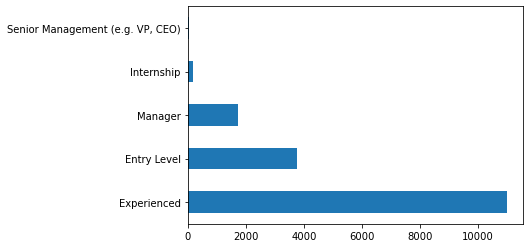

In [1006]:
levels=df['level'].value_counts().head()
levels.plot(kind='barh')

- we conclude that more than 10000 offers are for Experienced people and in the second place comed the Entry level jobs

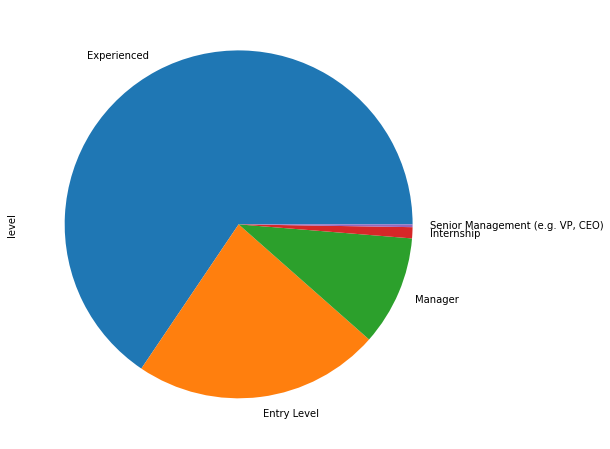

In [1005]:
levels.plot(kind='pie',figsize=(8,8));

- This pie chart shows clearly the big difference between the Experienced and the rest

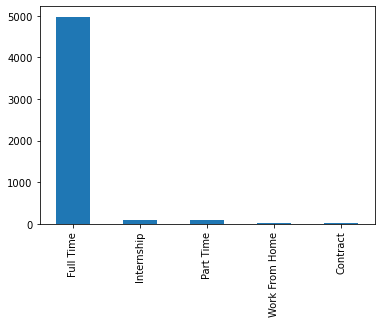

In [913]:
df.Type.value_counts()[1:].plot(kind='bar');

- we can conclude from here that most of the job offers are full time job offers 

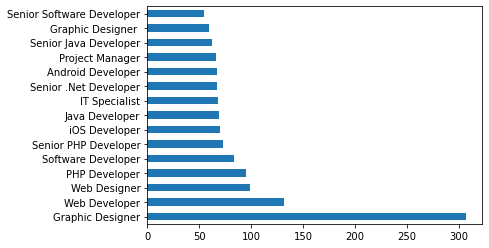

In [949]:
ax=df.job_title.value_counts()[:15].plot(kind='barh');

**we conclude that the most wanted job in the concatenated dataset is graphic designer**

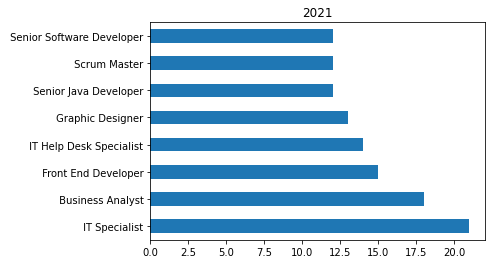

In [994]:
df[df.year == 2021].job_title.value_counts()[:8].plot(kind='barh',title='2021');


**we conclude that the most wanted job in 2021 is IT Specialist**


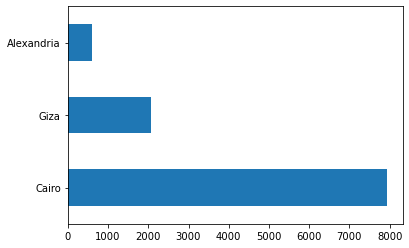

In [985]:
df.location.value_counts()[:3].plot(kind='barh');

**we can conclude here that most of the job offers are in Cairo then Giza**

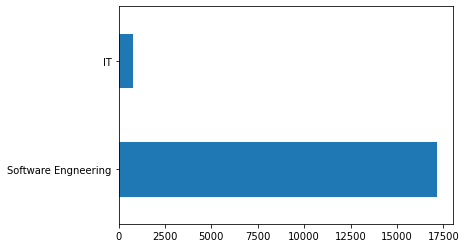

In [916]:
df.Standered_Title.value_counts()[:12].plot(kind='barh');

**we can conclude from here that the most wanted job is Software engineering  then IT**

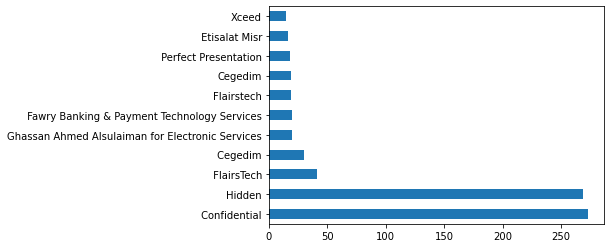

In [990]:
df.company.value_counts()[1:12].plot(kind='barh');

**Most of the job offers comes from these companies and it's obvious that alot of companies hide their name**

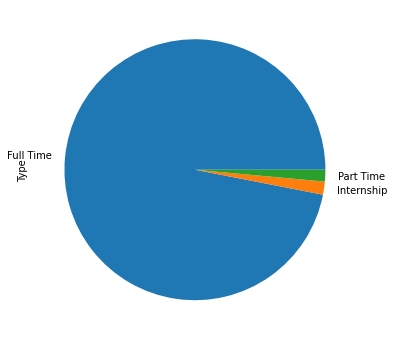

In [1004]:
df.Type.value_counts()[1:4].plot(kind='pie',figsize=(6,6));

**Full time is the most wanted job type**

In [917]:
df.tail(10)

,location,job_title,Standered_Title,job_industry,salary_minimum,salary_maximum,level,experience_years,description,payment_period,year,company,Type
2570,"Alexandria, Egypt",Back-End (PHP) Developer - Alexandria,Software Engneering,not mentioned,not mentioned,not mentioned,Experienced,3.0,Full Time · Experienced · 3+ Yrs of Exp · HTML...,not mentioned,2020,Caduceus Lane,Full Time
2571,"Dokki, Giza",Sr. Flutter Developer,Software Engneering,not mentioned,not mentioned,not mentioned,Experienced,2.0,Full Time · Experienced · 2-3 Yrs of Exp · Mob...,not mentioned,2020,3i Vision LTD.,Full Time
2572,"Nasr City, Cairo",Senior Web Developer,Software Engneering,not mentioned,not mentioned,not mentioned,Experienced,3.0,Full Time · Experienced · 3+ Yrs of Exp · Web ...,not mentioned,2020,Glamera,Full Time
2573,"Nasr City, Cairo",Senior Full Stack Developer - Nasr City,Software Engneering,not mentioned,not mentioned,not mentioned,Experienced,3.0,Full Time · Experienced · 3+ Yrs of Exp · Info...,not mentioned,2020,Superior Business Solutions,Full Time
2574,"Maadi, Cairo",Outsourcing Technical Support Specialist,Software Engneering,not mentioned,not mentioned,not mentioned,Experienced,3.0,Full Time · Shift Based · Experienced · 3+ Yrs...,not mentioned,2020,Interact Technology Solutions,Full Time
2575,"New Cairo, Cairo",Senior .Net Developer (NetEDI),Software Engneering,not mentioned,not mentioned,not mentioned,Experienced,5.0,Full Time · Experienced · 5+ Yrs of Exp · C# ·...,not mentioned,2020,Cegedim,Full Time
2576,"Maadi, Cairo",Senior Front End Developer,Software Engneering,not mentioned,not mentioned,not mentioned,Experienced,3.0,Full Time · Experienced · 3+ Yrs of Exp · Git ...,not mentioned,2020,Automated Systems,Full Time
2577,"Nasr City, Cairo",Senior PHP Developer - Nasr City,Software Engneering,not mentioned,not mentioned,not mentioned,Experienced,3.0,Full Time · Experienced · 3-10 Yrs of Exp · So...,not mentioned,2020,Maxycode,Full Time
2578,"Nasr City, Cairo",PHP Developer - intern,Software Engneering,not mentioned,not mentioned,not mentioned,Internship,0.0,Internship · Student · 0-1 Yrs of Exp · PHP · ...,not mentioned,2020,Magdsoft,Internship
2579,"New Cairo, Cairo",Php Back-end Developer,Software Engneering,not mentioned,not mentioned,not mentioned,Experienced,2.0,Full Time · Experienced · 2-5 Yrs of Exp · PHP...,not mentioned,2020,IPC,Full Time
